https://www.worldbank.org/en/topic/transport/publication/air-freight-study#markets

Air freight rates generally range from $1.50–$4.50 per kilogram. The demand for air freight is limited by cost, typically priced 4–5 times that of road transport and 12–16 times that of sea transport. 

Informasi: 
1. Air freight rates generally range from 1.50–4.50 per kilogram -> 3
2. Air freight priced 4–5 times that of road transport -> Road transport = Air freight / 4 = 0.75
3. Air freight priced 12–16 times that of sea transport -> Sea transport = Air freight / 15 = 0.20

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib.ticker as mtick
from scipy.stats import chi2_contingency
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.pipeline import Pipeline
# from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, precision_recall_curve, auc, classification_report
# from sklearn.metrics import ConfusionMatrixDisplay

style.use('fivethirtyeight')

In [2]:
df = pd.read_csv('Train.csv')
df['on_time'] = df['Reached.on.Time_Y.N'].apply(lambda x: 'yes' if x == 0 else 'no')
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,on_time
0,1,D,Flight,4,2,177,3,low,F,44,1233,1,no
1,2,F,Flight,4,5,216,2,low,M,59,3088,1,no
2,3,A,Flight,2,2,183,4,low,M,48,3374,1,no
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1,no
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1,no


In [3]:
df['Mode_of_Shipment'].unique()

array(['Flight', 'Ship', 'Road'], dtype=object)

In [4]:
def shipping_cost(x):
    if x == 'Flight':
        return 3.0
    elif x == 'Road':
        return 0.75
    else: return 0.20

In [5]:
df['shipping_cost'] = df['Mode_of_Shipment'].apply(lambda x: shipping_cost(x)) * df['Weight_in_gms'] / 1000
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,on_time,shipping_cost
0,1,D,Flight,4,2,177,3,low,F,44,1233,1,no,3.699
1,2,F,Flight,4,5,216,2,low,M,59,3088,1,no,9.264
2,3,A,Flight,2,2,183,4,low,M,48,3374,1,no,10.122
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1,no,3.531
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1,no,7.452


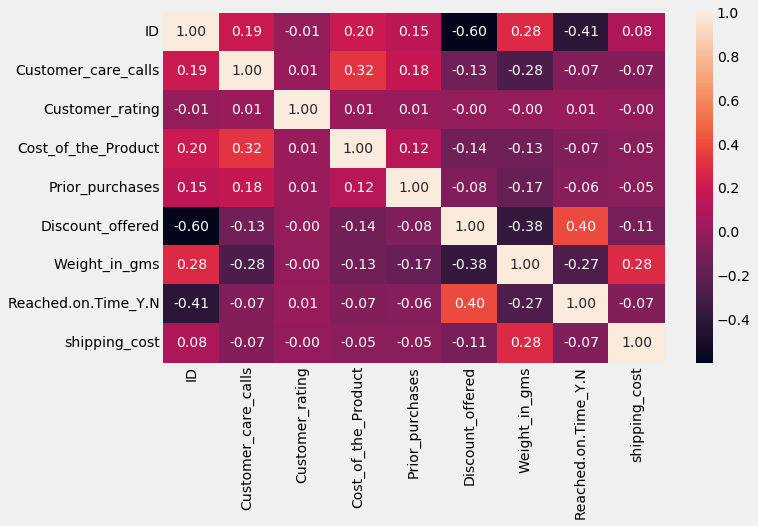

In [6]:
fig = plt.figure(figsize = (10,6))
sns.heatmap(df.corr(), annot = True, fmt = '.2f')

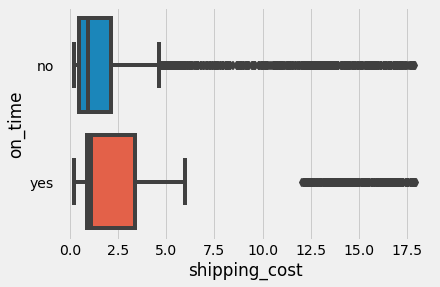

In [7]:
sns.boxplot(data = df, x = 'shipping_cost', y = 'on_time')

Skip, karena ternyata nggak guna ._.